In [194]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import date
import re

In [ ]:
!git clone https://github.com/NordAxon/scl_hbg_city_parking.git

In [195]:
dataset = pd.read_csv('scl_hbg_city_parking/1700_ParkingOccupancy.csv', #'1700_ParkingOccupancy.csv',
                      delimiter=";",
                      encoding='Windows-1252',
                      parse_dates=['Tidpunkt'])
dataset.rename(columns = {"Bel„ggning (%)": "Beläggning (%)", "Anl„ggning": "Anläggning"}, inplace=True)
dataset

,Tidpunkt,Antal belagda platser,Beläggning (%),Inpassager,Utpassager,Anläggning,Adress,antal_lediga_platser
0,2018-01-01 00:00:00,131,85,32,45,S t Nicolai,Bergaliden 11,8
1,2018-01-01 00:15:00,71,46,41,101,S t Nicolai,Bergaliden 11,68
2,2018-01-01 00:30:00,41,27,17,47,S t Nicolai,Bergaliden 11,98
3,2018-01-01 00:45:00,37,24,11,15,S t Nicolai,Bergaliden 11,102
4,2018-01-01 01:00:00,32,21,10,15,S t Nicolai,Bergaliden 11,107
...,...,...,...,...,...,...,...,...
69478,2019-12-30 23:00:00,48,35,0,0,S t Nicolai,Bergaliden 11,91
69479,2019-12-30 23:15:00,48,35,2,2,S t Nicolai,Bergaliden 11,91
69480,2019-12-30 23:30:00,48,35,2,2,S t Nicolai,Bergaliden 11,91
69481,2019-12-30 23:45:00,43,31,0,5,S t Nicolai,Bergaliden 11,96


In [196]:
dataset.insert( 5, 'date',    dataset['Tidpunkt'].dt.date)
dataset.insert( 6, 'month',   dataset['Tidpunkt'].dt.month)
dataset.insert( 7, 'day',     dataset['Tidpunkt'].dt.day)
dataset.insert( 8, 'hour',    dataset['Tidpunkt'].dt.hour)
dataset.insert( 9, 'minute',  dataset['Tidpunkt'].dt.minute)
dataset.insert(10, 'weekday', dataset['Tidpunkt'].dt.dayofweek+1)

dataset['month']  = dataset.month.map("{:02}".format)
dataset['day']    = dataset.day.map("{:02}".format)
dataset['hour']   = dataset.hour.map("{:02}".format)
dataset['minute'] = dataset.minute.map("{:02}".format)

dataset['date_str']    = dataset['date'].apply(str)
dataset['weekday_str'] = dataset['weekday'].apply(str)
dataset['month_str']   = dataset['month'].apply(str)
dataset['day_str']     = dataset['day'].apply(str)
dataset['hour_str']    = dataset['hour'].apply(str)
dataset['minute_str']  = dataset['minute'].apply(str)

#dataset.info()

dataset.insert(11, 'weekdayhour', dataset['weekday_str'] + '_' + dataset['hour_str'])
dataset.insert(12, 'dayhour',     dataset['day_str'] + '_' + dataset['hour_str'])
dataset.insert(13, 'monthday',    dataset['month_str'] + '_' + dataset['day_str'])
dataset.insert(14, 'datehour',    dataset['date_str'] + '_' + dataset['hour_str'])
dataset.insert(15, 'datetime',    dataset['date_str'] + ' ' + dataset['hour_str'] + ':' + dataset['minute_str'])


dataset = dataset.rename(columns={"Beläggning (%)": "Beläggning"})
dataset.info()
dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69483 entries, 0 to 69482
Data columns (total 25 columns):
Tidpunkt                 69483 non-null datetime64[ns]
Antal belagda platser    69483 non-null int64
Beläggning               69483 non-null int64
Inpassager               69483 non-null int64
Utpassager               69483 non-null int64
date                     69483 non-null object
month                    69483 non-null object
day                      69483 non-null object
hour                     69483 non-null object
minute                   69483 non-null object
weekday                  69483 non-null int64
weekdayhour              69483 non-null object
dayhour                  69483 non-null object
monthday                 69483 non-null object
datehour                 69483 non-null object
datetime                 69483 non-null object
Anläggning               69483 non-null object
Adress                   69483 non-null object
antal_lediga_platser     69483 non-null in

,Tidpunkt,Antal belagda platser,Beläggning,Inpassager,Utpassager,date,month,day,hour,minute,...,datetime,Anläggning,Adress,antal_lediga_platser,date_str,weekday_str,month_str,day_str,hour_str,minute_str
0,2018-01-01 00:00:00,131,85,32,45,2018-01-01,01,01,00,00,...,2018-01-01 00:00,S t Nicolai,Bergaliden 11,8,2018-01-01,1,01,01,00,00
1,2018-01-01 00:15:00,71,46,41,101,2018-01-01,01,01,00,15,...,2018-01-01 00:15,S t Nicolai,Bergaliden 11,68,2018-01-01,1,01,01,00,15
2,2018-01-01 00:30:00,41,27,17,47,2018-01-01,01,01,00,30,...,2018-01-01 00:30,S t Nicolai,Bergaliden 11,98,2018-01-01,1,01,01,00,30
3,2018-01-01 00:45:00,37,24,11,15,2018-01-01,01,01,00,45,...,2018-01-01 00:45,S t Nicolai,Bergaliden 11,102,2018-01-01,1,01,01,00,45
4,2018-01-01 01:00:00,32,21,10,15,2018-01-01,01,01,01,00,...,2018-01-01 01:00,S t Nicolai,Bergaliden 11,107,2018-01-01,1,01,01,01,00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69478,2019-12-30 23:00:00,48,35,0,0,2019-12-30,12,30,23,00,...,2019-12-30 23:00,S t Nicolai,Bergaliden 11,91,2019-12-30,1,12,30,23,00
69479,2019-12-30 23:15:00,48,35,2,2,2019-12-30,12,30,23,15,...,2019-12-30 23:15,S t Nicolai,Bergaliden 11,91,2019-12-30,1,12,30,23,15
69480,2019-12-30 23:30:00,48,35,2,2,2019-12-30,12,30,23,30,...,2019-12-30 23:30,S t Nicolai,Bergaliden 11,91,2019-12-30,1,12,30,23,30
69481,2019-12-30 23:45:00,43,31,0,5,2019-12-30,12,30,23,45,...,2019-12-30 23:45,S t Nicolai,Bergaliden 11,96,2019-12-30,1,12,30,23,45


In [197]:
# =============================================================================
# välj kolumn som plotten ska baseras på samt vilken anläggning du vill följa
# =============================================================================

dataset.Anläggning.unique()

array(['S t Nicolai'], dtype=object)

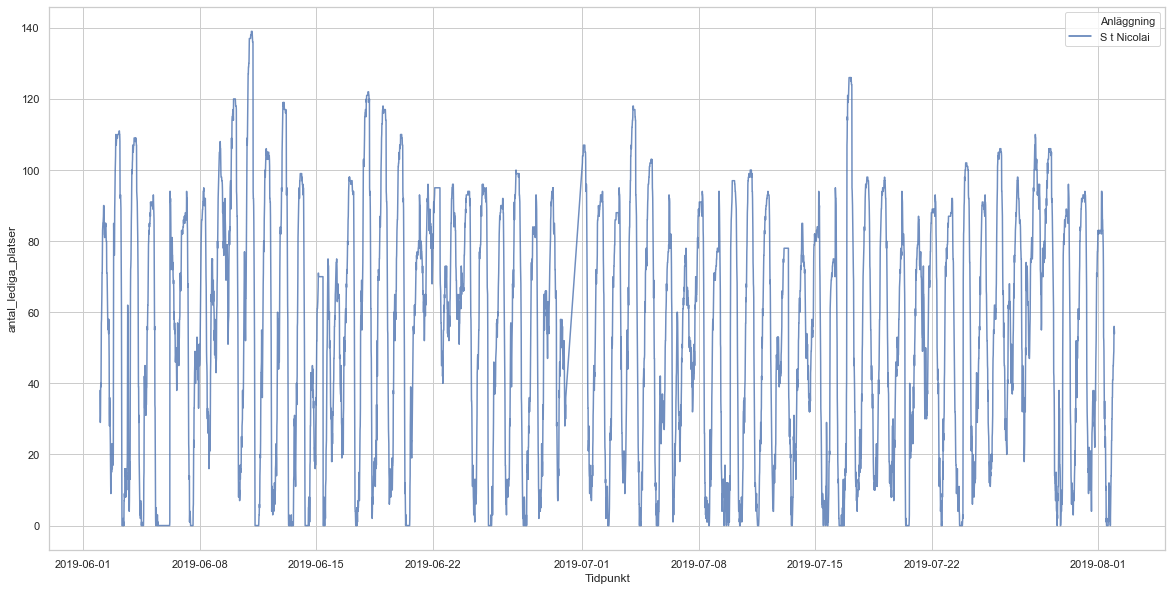

In [198]:
plotvar = 'Tidpunkt'
anlaggning = 'S t Nicolai'
start_date = date(2019, 6, 1)
end_date = date(2019, 8, 1)

mask = (dataset['date'] > start_date) & (dataset['date'] <= end_date)

plotdata_beta = dataset.loc[mask]
 
# plotdata_beta = dataset[start_dt <= (dataset['date']) & (dataset['date']) <= end_dt]
plotdata_small = plotdata_beta[[plotvar, 'Anläggning', 'antal_lediga_platser']]
# new_set = dataset_small.set_index([plotvar])

# set_pivot = new_set.pivot(columns='Anläggning', values='Beläggning (%)')
# set_pivot = set_pivot.drop(columns='Klubbstugorna')

# set_corr = set_pivot.corr()

plotdata = plotdata_small[[plotvar, 'Anläggning', 'antal_lediga_platser']].groupby([plotvar, 'Anläggning'], as_index=False).mean()
plotdata = plotdata[(plotdata['Anläggning']==anlaggning)]
plotdata = plotdata.sort_values([plotvar],ascending=[True])

plt.figure(figsize=(20, 10))
sns.set(style='whitegrid')
sns.lineplot(
    x=plotvar,
    y='antal_lediga_platser',
    hue='Anläggning',
    data=plotdata,
    alpha=0.8
)
plt.show()

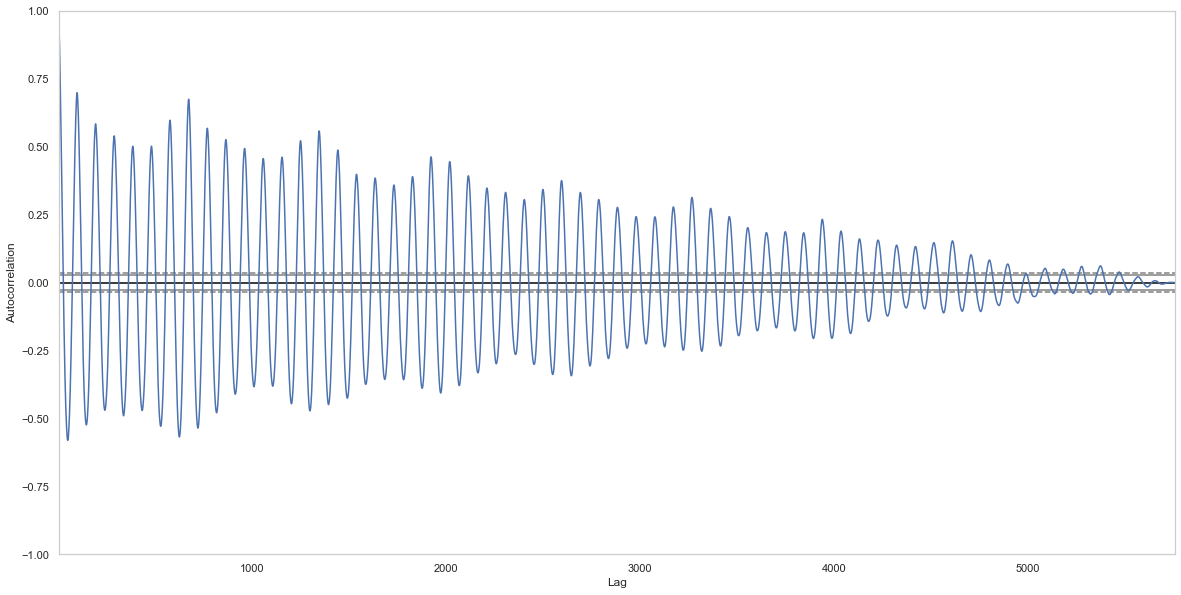

In [199]:
plotdata = plotdata.drop(columns='Anläggning')
plotdata = plotdata.set_index([plotvar])
# plotdata = plotdata.set_index()

plt.figure(figsize=(20, 10))
pd.plotting.autocorrelation_plot(plotdata)
plt.show()

In [200]:
plotdata

,antal_lediga_platser
Tidpunkt,
2019-06-02 00:00:00,38
2019-06-02 00:15:00,34
2019-06-02 00:30:00,29
2019-06-02 00:45:00,31
2019-06-02 01:00:00,39
...,...
2019-08-01 22:45:00,49
2019-08-01 23:00:00,56
2019-08-01 23:15:00,56


In [201]:
from statsmodels.tsa import arima_model
from sklearn.metrics import mean_squared_error

model = arima_model.ARIMA(plotdata, order=(3,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

C:\Users\Succe\.conda\envs\pytorch_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Succe\.conda\envs\pytorch_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                               ARIMA Model Results                                
Dep. Variable:     D.antal_lediga_platser   No. Observations:                 5754
Model:                     ARIMA(3, 1, 0)   Log Likelihood              -17038.498
Method:                           css-mle   S.D. of innovations              4.675
Date:                    Mon, 04 May 2020   AIC                          34086.996
Time:                            08:31:38   BIC                          34120.285
Sample:                                 1   HQIC                         34098.581
                                                                                  
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            0.0016      0.117      0.013      0.989      -0.228       0.231
ar.L1.D.antal_lediga_platser     0.2231      

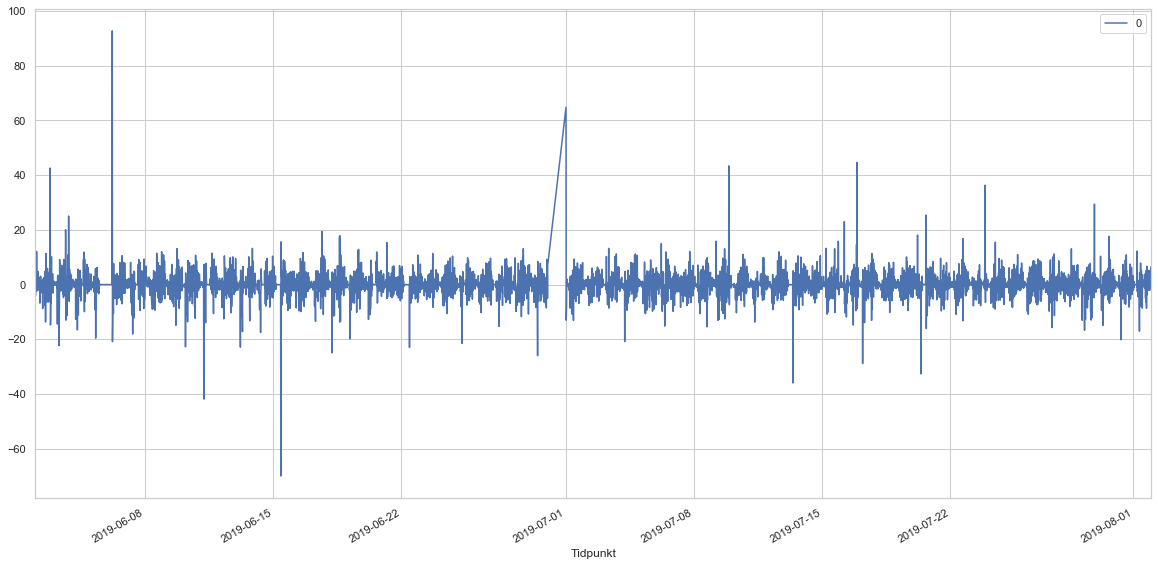

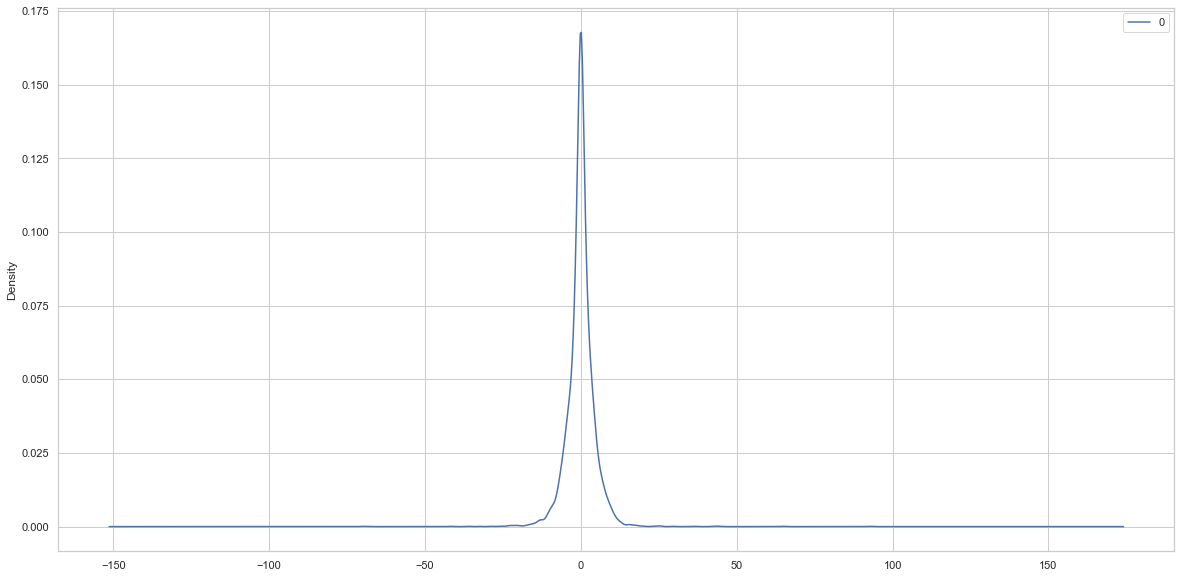

                 0
count  5754.000000
mean      0.000590
std       4.675333
min     -70.000829
25%      -1.718214
50%      -0.000829
75%       1.823699
max      92.776026


In [202]:
residuals = pd.DataFrame(model_fit.resid)
residuals.plot(figsize=(20,10))
plt.show()
residuals.plot(figsize=(20,10), kind='kde')
plt.show()
print(residuals.describe())

In [203]:
X = plotdata.antal_lediga_platser
size = int(len(X) *0.86)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]


Test MSE: 16.574


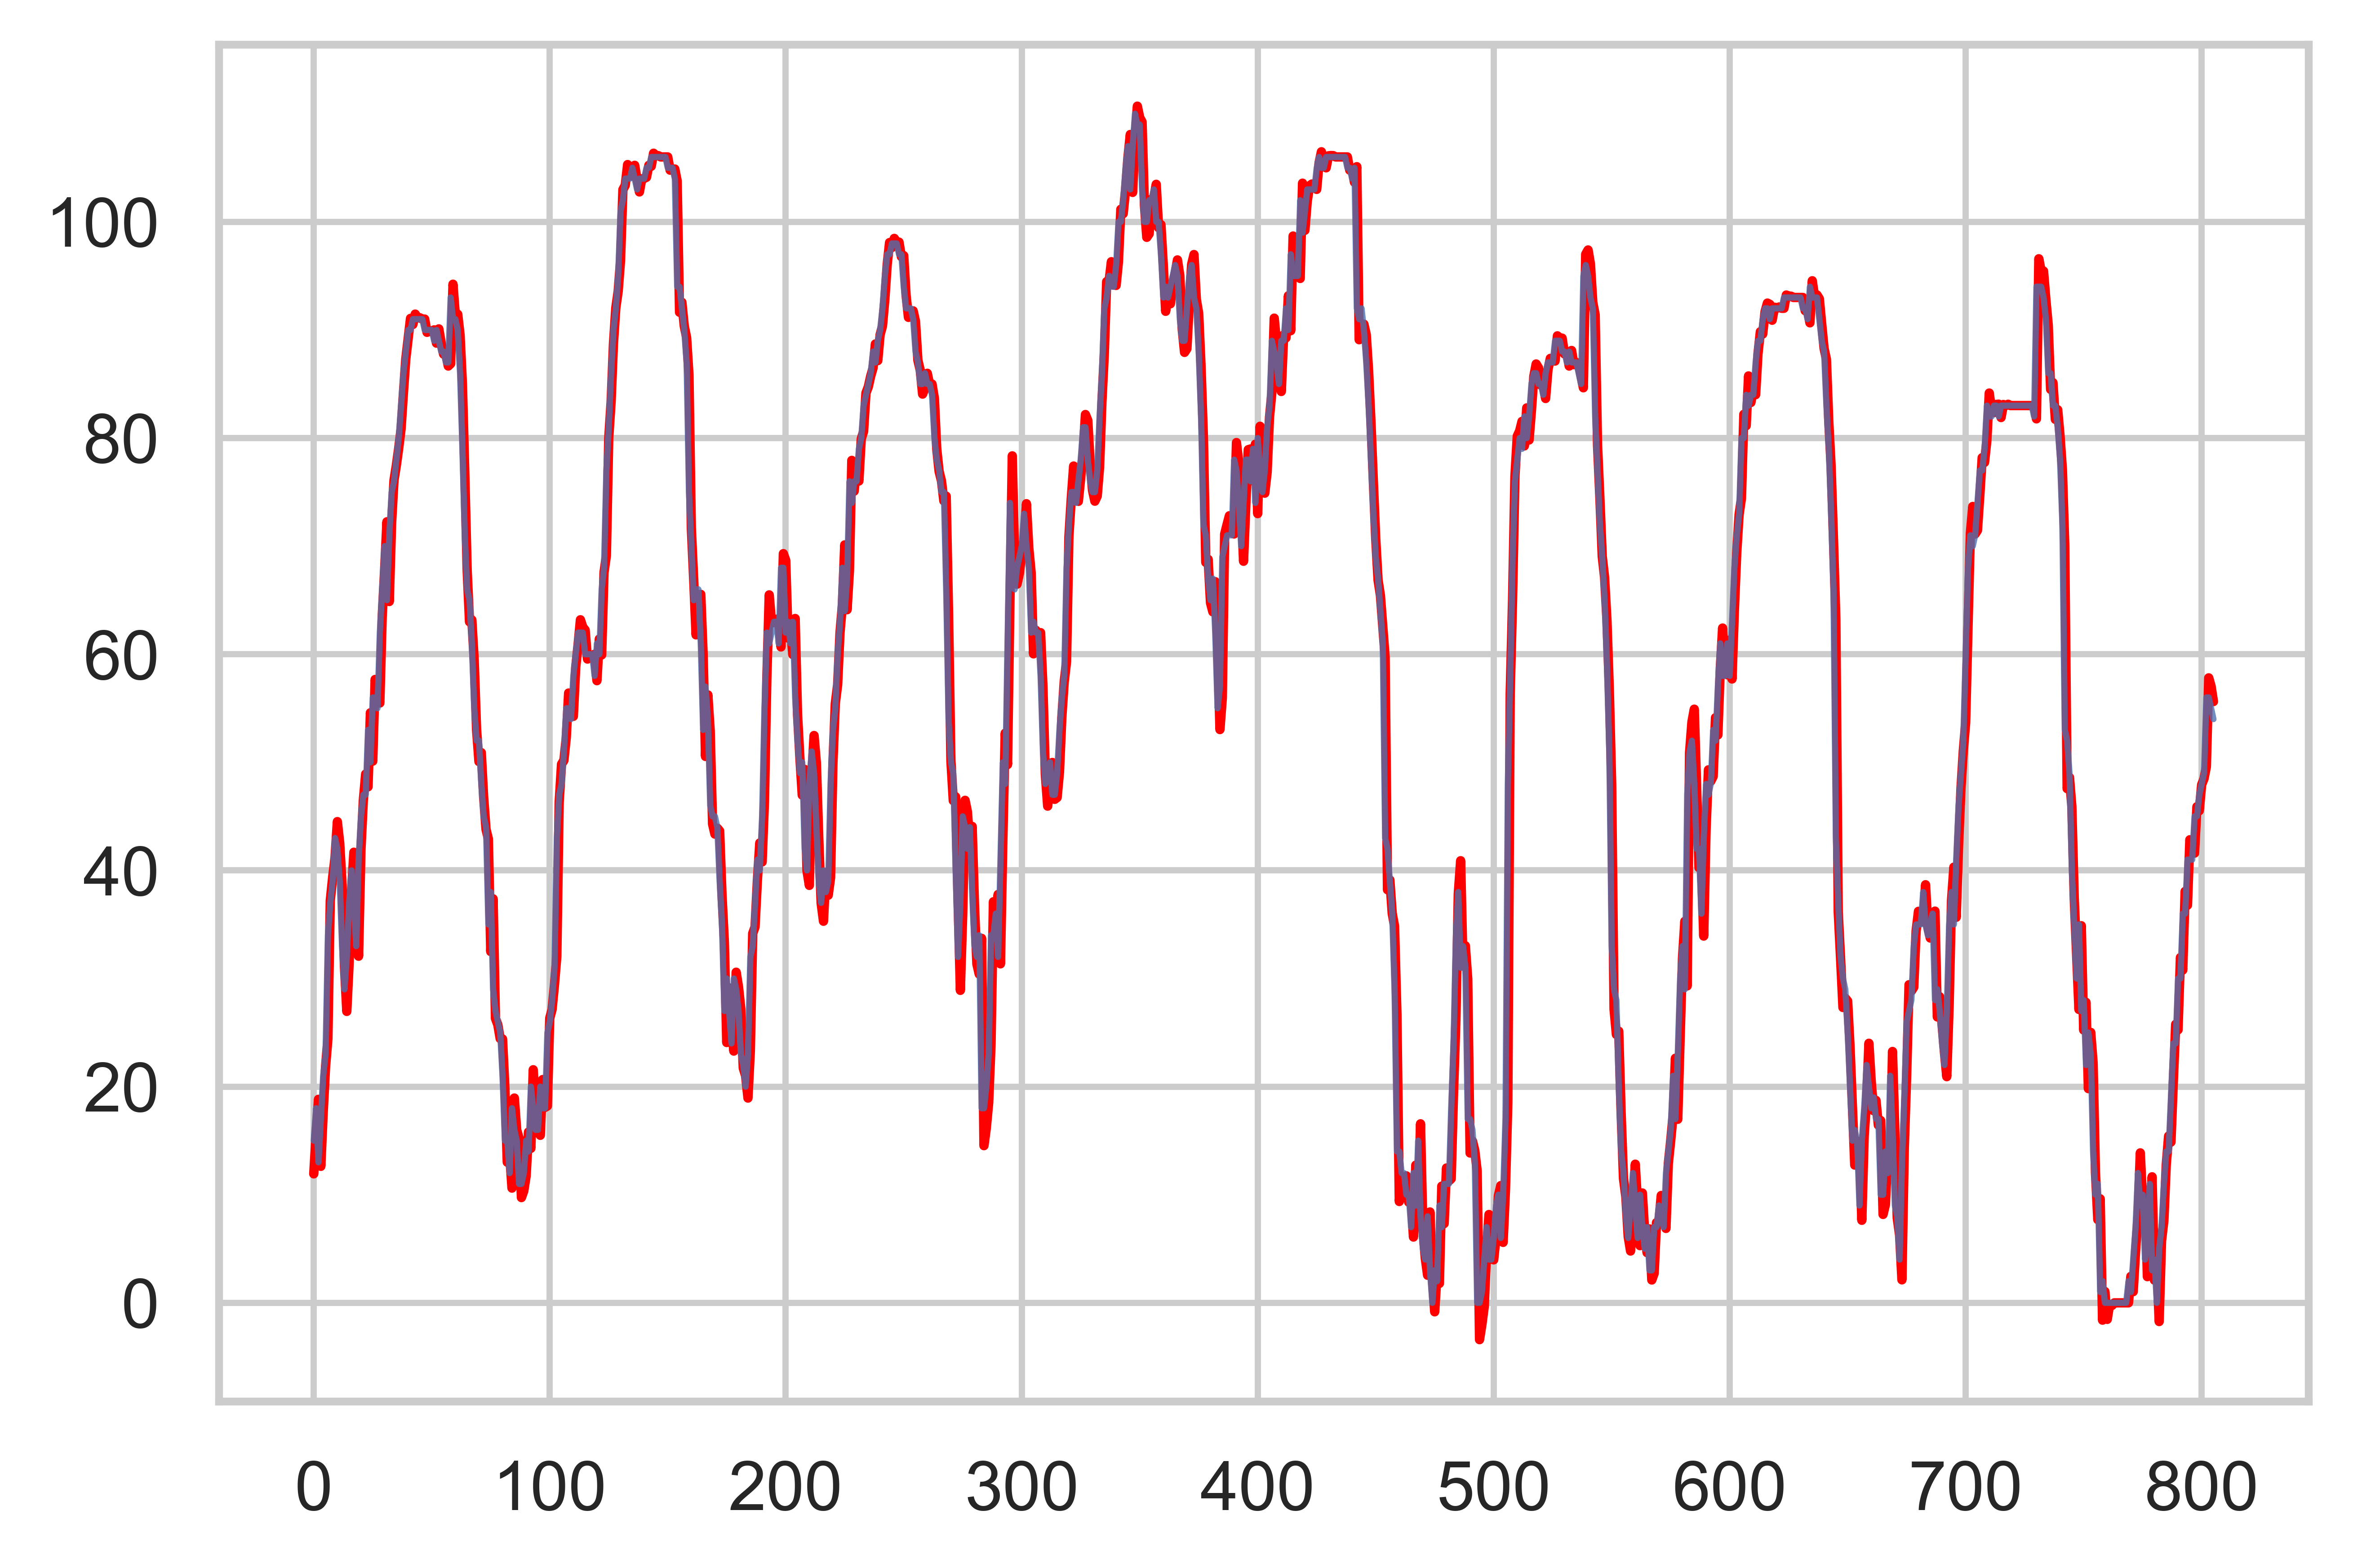

In [204]:
from tqdm.notebook import tqdm

steps = 1 # Each step correspond to 15 min
predictions = list()
for t in tqdm(range(0, len(test), steps)):
    # Retrain
    model = arima_model.ARIMA(history, order=(3,1,0))
    model_fit = model.fit(disp=0)
    yhat, _, _ = model_fit.forecast(steps=steps) # Predict next 15 min

    predictions += list(yhat)
    
    obs = list(test.values[t:t+steps])
    history += obs
    print('predicted=%f, expected=%f' % (yhat, obs))
    
# In case, wrong
length = min(len(test), len(predictions))

error = mean_squared_error(test[:length], predictions[:length])
print('Test MSE: %.3f' % error)
# test.info()
test2 = pd.Series.reset_index(test,drop=True)
plt.figure(dpi=1200)
plt.plot(predictions, color='red')
plt.plot(test2, alpha=0.8, linewidth=1)
plt.show()

In [ ]:
model_fit.save('test.pkl')

In [ ]:
preds = pd.DataFrame(predictions)
preds.columns=['Prediction']
# preds.rename({'0': 'Prediction'}, axis='columns', inplace=True)
outcome = pd.DataFrame(test.reset_index())
results = pd.concat([outcome, preds], axis = 1)

start_date_str = start_date.strftime("%Y-%m-%d")
start_date_str = re.sub('-','',start_date_str)
end_date_str = end_date.strftime("%Y-%m-%d")
end_date_str = re.sub('-','',end_date_str)

filespec = anlaggning + ' ' + start_date_str + '_' + end_date_str

results.to_csv('ParkingOccupancy_'+filespec+'.csv',sep=";")
# plt.savefig('/mnt/SmarterCityLab/Graphs/'+anlaggning+'.png', dpi=1200)